Подключим библиотечки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

---------
# 1. Преобразование изображения в тензоры R, G, B
---------

Откроем картинку, нормализуем её и зафиксируем каналы с пикселями

In [2]:
image = Image.open("../cat.jpg").convert("RGB")
image_np = np.array(image) / 255.0

R = image_np[:, :, 0]
G = image_np[:, :, 1]
B = image_np[:, :, 2]

print(f"Размер изображения: {image_np.shape}")
print(f"Формы цветовых  каналов: {R.shape}, {G.shape}, {B.shape}")


Размер изображения: (1280, 959, 3)
Формы цветовых  каналов: (1280, 959), (1280, 959), (1280, 959)


Посмотрим изначальную картинку


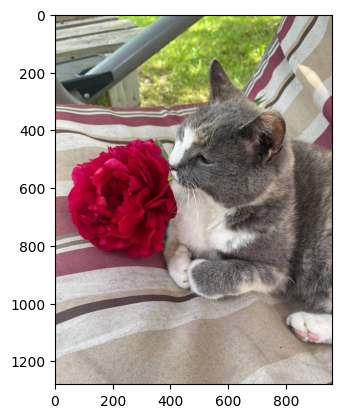

In [3]:
plt.imshow(image)

Посмотрим че лежит в изначальных каналах

In [4]:
R

array([[0.48627451, 0.49411765, 0.50196078, ..., 0.61568627, 0.59607843,
        0.58039216],
       [0.4745098 , 0.48235294, 0.48627451, ..., 0.61568627, 0.59607843,
        0.58431373],
       [0.48235294, 0.48627451, 0.48235294, ..., 0.61176471, 0.59607843,
        0.58823529],
       ...,
       [0.85882353, 0.83921569, 0.78039216, ..., 0.56862745, 0.52941176,
        0.54509804],
       [0.82352941, 0.81568627, 0.76470588, ..., 0.51372549, 0.4745098 ,
        0.56862745],
       [0.77254902, 0.81568627, 0.80392157, ..., 0.56078431, 0.51764706,
        0.63529412]], shape=(1280, 959))

In [5]:
G

array([[0.45882353, 0.46666667, 0.4745098 , ..., 0.58823529, 0.56862745,
        0.54901961],
       [0.44705882, 0.45490196, 0.45882353, ..., 0.58823529, 0.56862745,
        0.55294118],
       [0.45490196, 0.45882353, 0.45490196, ..., 0.58431373, 0.56862745,
        0.55686275],
       ...,
       [0.82352941, 0.80392157, 0.74509804, ..., 0.34117647, 0.30196078,
        0.31764706],
       [0.78823529, 0.78039216, 0.72941176, ..., 0.2745098 , 0.23529412,
        0.32941176],
       [0.7372549 , 0.78039216, 0.76862745, ..., 0.31372549, 0.27058824,
        0.38823529]], shape=(1280, 959))

In [6]:
B

array([[0.38823529, 0.39607843, 0.40392157, ..., 0.51764706, 0.49803922,
        0.4745098 ],
       [0.37647059, 0.38431373, 0.38823529, ..., 0.51764706, 0.49803922,
        0.47843137],
       [0.38431373, 0.38823529, 0.38431373, ..., 0.51372549, 0.49803922,
        0.48235294],
       ...,
       [0.78823529, 0.76862745, 0.70980392, ..., 0.4       , 0.36078431,
        0.37647059],
       [0.75294118, 0.74509804, 0.69411765, ..., 0.3372549 , 0.29803922,
        0.39215686],
       [0.70196078, 0.74509804, 0.73333333, ..., 0.38039216, 0.3372549 ,
        0.45490196]], shape=(1280, 959))

Визуализируем изначальную картинку по цветовым каналам

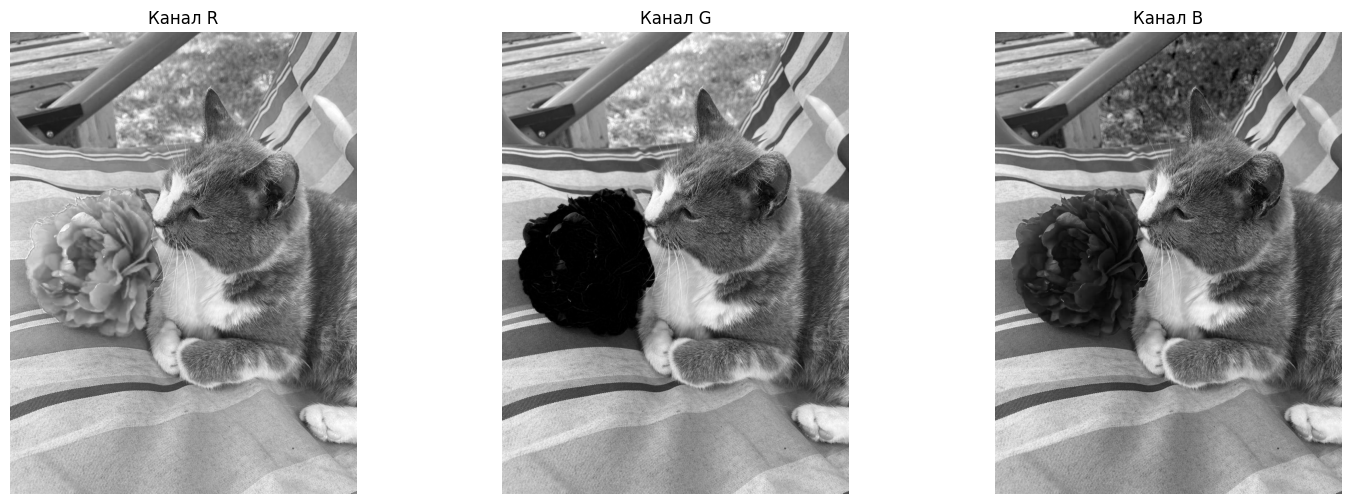

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, (channel, name) in enumerate(zip([R, G, B], ['R', 'G', 'B'])):
    axes[i].imshow(channel, cmap='gray')
    axes[i].set_title(f'Канал {name}')
    axes[i].axis('off')
plt.show()

---------
# 2. Сингулярное разложение с помощью степенного метода
---------

Напишем свой степенной метод

In [8]:
def power_method(channel, num_iter=150, tol=1e-10):
    m, n = channel.shape
    x = np.random.rand(n)
    x /= np.linalg.norm(x)
    for i in range(num_iter):
        y = channel.T @ (channel @ x)
        x_new = y / np.linalg.norm(y)
        if np.linalg.norm(x - x_new) < tol:
            break
        x = x_new
    sigma = np.linalg.norm(channel @ x)
    u = channel @ x / sigma
    return sigma, u, x


Приближённо вычисляется наибольшее сингулярное число $\sigma_1$ каждого цветового канала.

Для оценки точности приближения строится ранг-1 матрица:
$$
\tilde{A} = \sigma_1 \cdot u_1 v_1^T
$$
и вычисляется евклидова ошибка восстановления:
$$
\text{Ошибка} = \left\| A - \tilde{A} \right\|_2
$$


И проведем эксперименты для трёх значений количества итераций метода: $N = 10,\ 50,\ 100$.

In [9]:
def analyze_channel(channel, name='R', N_iter=[100, 150]):
    errors = []
    print(f"\nАнализ канала {name}:")
    for N in N_iter:
        sigma, u, v = power_method(channel, num_iter=N)
        approx = sigma * np.outer(u, v)
        err = np.linalg.norm(channel - approx)
        print(f"Итерации: {N} : σ ≈ {sigma:.6f}, ошибка ≈ {err:.6f}")
        errors.append((N, sigma, err))
    return errors

In [10]:
errors_R = analyze_channel(R, 'R', N_iter=[10, 50, 100])
errors_G = analyze_channel(G, 'G', N_iter=[10, 50, 100])
errors_B = analyze_channel(B, 'B', N_iter=[10, 50, 100])


Анализ канала R:
Итерации: 10 : σ ≈ 652.538443, ошибка ≈ 186.896434
Итерации: 50 : σ ≈ 652.538443, ошибка ≈ 186.896434
Итерации: 100 : σ ≈ 652.538443, ошибка ≈ 186.896434

Анализ канала G:
Итерации: 10 : σ ≈ 587.872593, ошибка ≈ 227.440836
Итерации: 50 : σ ≈ 587.872593, ошибка ≈ 227.440836
Итерации: 100 : σ ≈ 587.872593, ошибка ≈ 227.440836

Анализ канала B:
Итерации: 10 : σ ≈ 538.145980, ошибка ≈ 208.843717
Итерации: 50 : σ ≈ 538.145980, ошибка ≈ 208.843717
Итерации: 100 : σ ≈ 538.145980, ошибка ≈ 208.843717


--------
# 3. Распределение сингулярных чисел и усечённое SVD
---------

Теперь исследуем полный сингулярный спектр цветовых каналов изображения. С помощью `numpy.linalg.svd` получили для матриц R, G и B отсортированные по убыванию списки сингулярных чисел $\sigma_i$ и построили их распределение (ось X — номер сингулярного числа $i$, ось Y — значение $\sigma_i$).

959 959 959


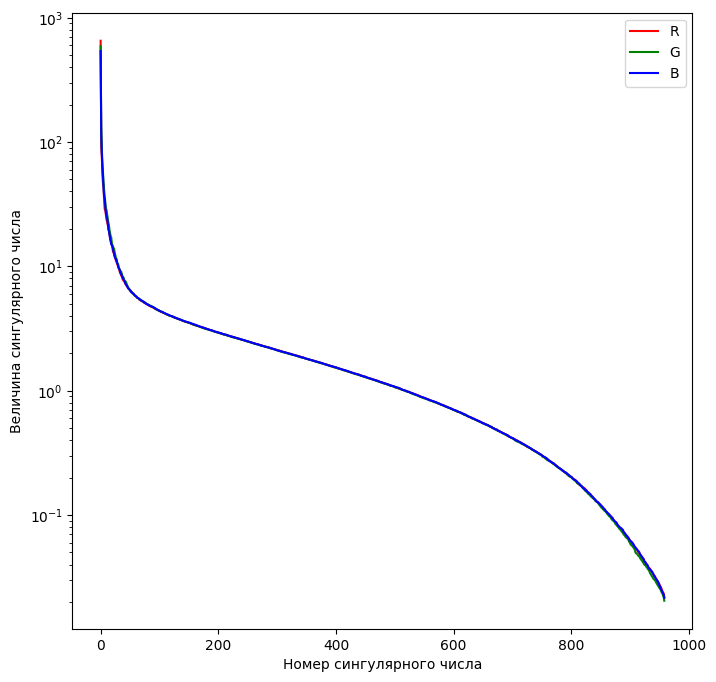

In [11]:
_, sR, _ = np.linalg.svd(R, full_matrices=False)
_, sG, _ = np.linalg.svd(G, full_matrices=False)
_, sB, _ = np.linalg.svd(B, full_matrices=False)
print(len(sR), len(sG), len(sB))

plt.figure(figsize=(8, 8))
plt.plot(sR, 'r-', label='R')
plt.plot(sG, 'g-', label='G')
plt.plot(sB, 'b-', label='B')
plt.xlabel('Номер сингулярного числа')
plt.ylabel('Величина сингулярного числа')
plt.legend()
plt.yscale('log')
plt.show()

### Основные наблюдения:

1. **Стремительный спад в начале**
   - Первые $50\text{–}100$ сингулярных чис удерживают подавляющую часть энергии канала.
   - Видно резкое падение графика от $i=1$ до $i\approx100$.

2. **Сходство форм кривых**
   - Для всех каналов R, G и B формы распределений  совпадают.

3. **Хвостик**
   - После $i\approx300$ сингулярные числа падают ниже $0.1$, т.е. оставшиеся компоненты содержат в основном шум или очень мелкие детали.

**Вывод:**

Анализ спектра показывает, что оптимальное соотношение «объём данных ↔ качество» достигается при $k$ в диапазоне **50–100**. Для практического сжатия достаточно усечённого SVD с $k\approx50$, а для почти безупречного восстановления целесообразно поднять $k$ до **100–150**.

---

Теперь восстановим картинку с помощью усеченного svd

In [12]:
def truncated_svd_reconstruction(A, k):
    U, S, Vt = np.linalg.svd(A, full_matrices=False)
    S_trunc = np.diag(S[:k])
    A_recon = U[:, :k] @ S_trunc @ Vt[:k, :]
    return A_recon

In [13]:
def reconstruct_rgb_image(k):
    R_recon = truncated_svd_reconstruction(R, k)
    G_recon = truncated_svd_reconstruction(G, k)
    B_recon = truncated_svd_reconstruction(B, k)

    img_recon = np.stack([R_recon, G_recon, B_recon], axis=2)
    img_recon = np.clip(img_recon, 0, 1)
    return img_recon

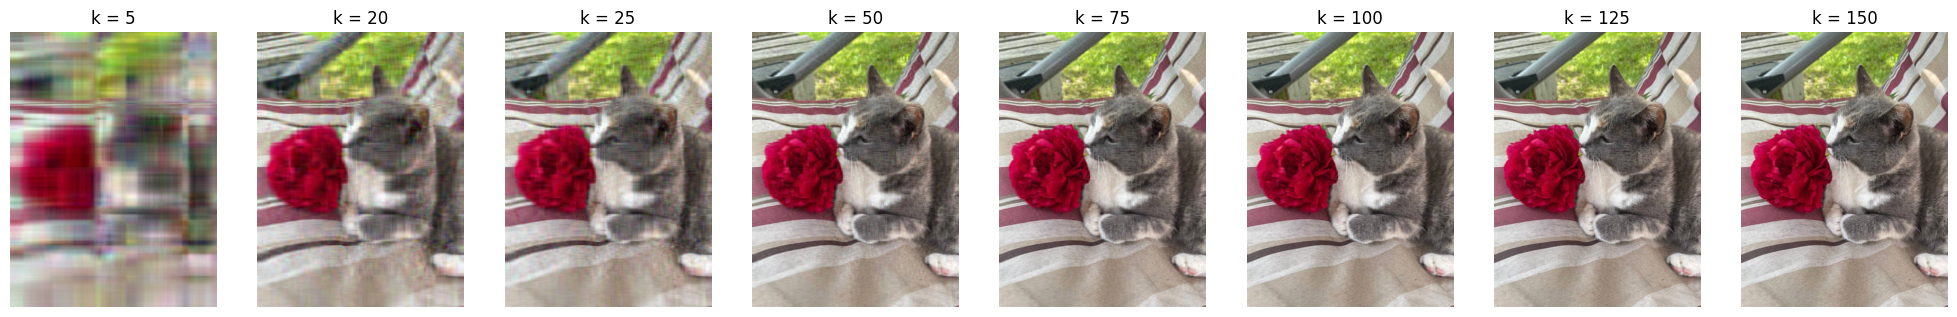

In [14]:
k_values = [5, 20, 25, 50, 75, 100, 125, 150]

plt.figure(figsize=(25, 8))
for i, k in enumerate(k_values):
    recon_img = reconstruct_rgb_image(k)
    plt.subplot(1, len(k_values), i + 1)
    plt.imshow(recon_img)
    plt.title(f"k = {k}")
    plt.axis("off")
plt.show()


### Анализ результатов усечённого SVD:

- **k = 5**
  Ниче не видно

- **k = 20**
   Контуры   размыты, видны только крупные цветовые пятна; детализация практически отсутствует.

- **k = 50**
    Все еще размыто, но уже более менее видно четкость, на крупных деталях есть шумы

- **k = 75**
  Качество почти не отличается от оригинала, дальнейшее увеличение k даёт незначительный прирост к яркости и детализации.

**Вывод:**
  Для большинства задач достаточно **k ≈ 75** — значительное снижение объёма данных при хорошем визуальном качестве.


--------
# 4. Вычисление сингулярных чисел методом вращений Якоби
--------

1. С помощью функции `jacobi_eigenvals` вычисляем собственные значения матрицы $R^T R$, берём их квадратный корень и сортируем по убыванию:
   $$\sigma_i^{(\mathrm{Jacobi})} = \sqrt{\lambda_i\bigl(R^T R\bigr)},\quad
     \lambda_1 \ge \lambda_2 \ge \dots$$

2. Покажем первые $n_{\rm print} = 100$ значений каждого метода и вычисляем
   - среднюю абсолютную разницу
   - евклидову норму вектора разностей

3. Построим график сравнения (ось X — индекс $i$, ось Y — $\sigma_i$ в log–шкале).

In [15]:
def jacobi_eigenvalues(A, tol=1e-10, max_iter=1000):
    n = A.shape[0]
    V = np.eye(n)
    for _ in range(max_iter):
        max_off = 0.0
        p, q = 0, 0
        for i in range(n):
            for j in range(i + 1, n):
                if abs(A[i, j]) > max_off:
                    max_off = abs(A[i, j])
                    p, q = i, j
        if max_off < tol:
            break

        if A[p, p] == A[q, q]:
            theta = np.pi / 4
        else:
            theta = 0.5 * np.arctan(2 * A[p, q] / (A[p, p] - A[q, q]))

        G = np.eye(n)
        G[p, p] = np.cos(theta)
        G[q, q] = np.cos(theta)
        G[p, q] = -np.sin(theta)
        G[q, p] = np.sin(theta)

        A = G.T @ A @ G
        V = V @ G
    eigenvalues = np.diag(A)
    return eigenvalues, V

In [16]:
A = R.T @ R
eigenvalues, _ = jacobi_eigenvalues(A, tol=1e-6)
singular_values_jacobi = np.sqrt(np.sort(eigenvalues)[::-1])

In [17]:
def deflation_svd(A, k=100):
    sigmas = []
    A_copy = A.copy().astype(float)
    for _ in range(k):
        sigma, u, v = power_method(A_copy)
        sigmas.append(sigma)
        A_copy -= sigma * np.outer(u, v)
    return np.array(sigmas)

In [18]:
singular_values_power = deflation_svd(R, k=100)

In [19]:
_, S_numpy, _ = np.linalg.svd(R, full_matrices=False)

In [20]:
n_print = 100

print(f"Первые {n_print} сингулярных чисел по Якоби:")
print(np.round(singular_values_jacobi[:n_print], 6))

print(f"\nПервые {n_print} сингулярных чисел степенным методом:")
print(np.round(singular_values_power[:n_print], 6))

print(f"\nПервые {n_print} сингулярных чисел NumPy SVD:")
print(np.round(S_numpy[:n_print], 6))

diff_power = S_numpy[:n_print] - singular_values_power[:n_print]
diff_jacobi = S_numpy[:n_print] - singular_values_jacobi[:n_print]

print(f"\nСредняя абсолютная разница степенного метода vs NumPy: {np.mean(np.abs(diff_power)):.6e}")
print(f"Норма вектора разностей степенного метода vs NumPy: {np.linalg.norm(diff_power):.6e}")

print(f"\nСредняя абсолютная разница Якоби vs NumPy: {np.mean(np.abs(diff_jacobi)):.6e}")
print(f"Норма вектора разностей Якоби vs NumPy: {np.linalg.norm(diff_jacobi):.6e}")

Первые 100 сингулярных чисел по Якоби:
[652.494226   8.136897   7.913004   7.901552   7.815466   7.786472
   7.777202   7.77303    7.770297   7.765135   7.74426    7.743836
   7.724486   7.720228   7.711513   7.705758   7.704563   7.694418
   7.690743   7.689982   7.68933    7.688438   7.687672   7.683008
   7.682225   7.681959   7.681533   7.677131   7.676184   7.671282
   7.661722   7.660395   7.658996   7.647808   7.645536   7.643608
   7.643469   7.636704   7.63666    7.633873   7.632093   7.625562
   7.624596   7.620454   7.62043    7.617918   7.617907   7.615004
   7.614082   7.611498   7.608812   7.60614    7.604605   7.604575
   7.604377   7.599324   7.599078   7.598779   7.593645   7.592941
   7.589067   7.586466   7.584531   7.583583   7.573852   7.573585
   7.566678   7.565034   7.564385   7.563296   7.558672   7.557216
   7.556886   7.551079   7.550845   7.547759   7.546582   7.544383
   7.544192   7.541653   7.538085   7.531635   7.529502   7.523008
   7.522375   7.520982 

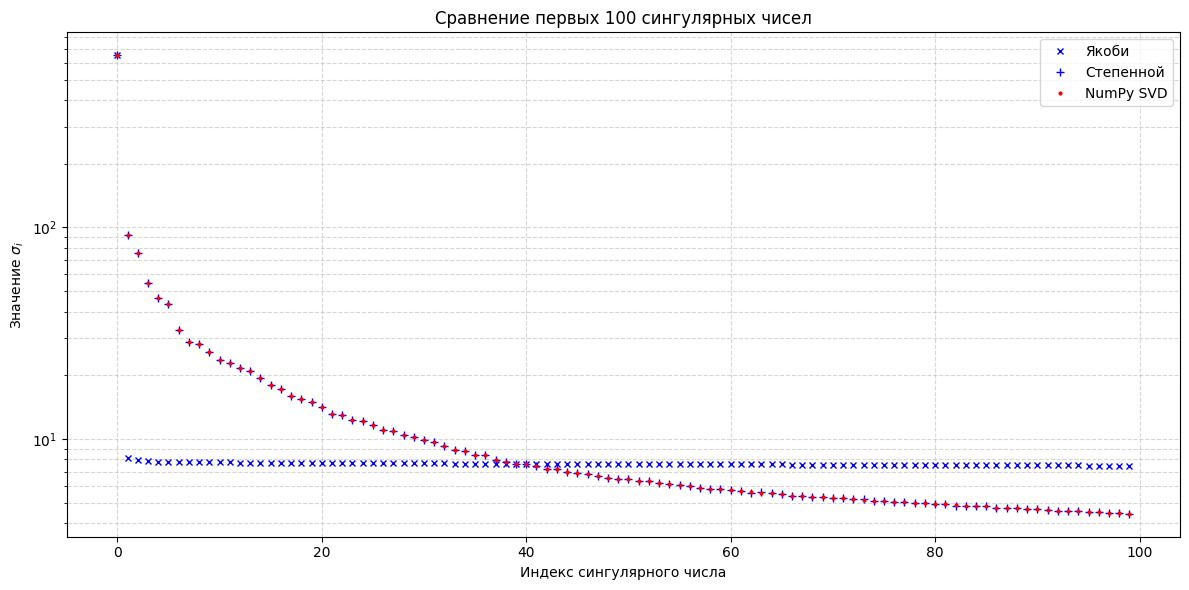

In [21]:
k = 100
plt.figure(figsize=(12, 6))

plt.plot(singular_values_jacobi[:k], 'bx', markersize=4, label='Якоби')
plt.plot(singular_values_power[:k], 'b+', markersize=6, label='Степенной')
plt.plot(S_numpy[:k], 'r.', markersize=4, label='NumPy SVD')

plt.title('Сравнение первых {} сингулярных чисел'.format(k))
plt.xlabel('Индекс сингулярного числа')
plt.ylabel(r'Значение $\sigma_i$ ')

plt.yscale('log')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

### Анализ графика:

- **Точность**
  Средняя ошибка порядка  и норма разностей  указывают на примерное сходство между методами, зависит от порядка сингулярного числа.

- **Графическое сравнение**
  - Метод Якоби корректно находит лишь первые несколько $\sigma_i$, дальше кривая почти выравнивается и не отражает экспоненциальный спад истинного спектра.
  - Степенной метод с дефляцией воспроизводит плавно убывающий профиль, характерный для сингулярных чис матрицы.
  - Метод Numpy SVD схож с Якоби.



In [22]:
histR, _ = np.histogram(R, bins=256, range=(0, 255))
histG, _ = np.histogram(G, bins=256, range=(0, 255))
histB, _ = np.histogram(B, bins=256, range=(0, 255))

meanR, stdR = np.mean(R) * 255, np.std(R) * 255
meanG, stdG = np.mean(G) * 255, np.std(G) * 255
meanB, stdB = np.mean(B) * 255, np.std(B) * 255

print(f"R: mean={meanR:.1f}, std={stdR:.1f}")
print(f"G: mean={meanG:.1f}, std={stdG:.1f}")
print(f"B: mean={meanB:.1f}, std={stdB:.1f}")

R: mean=148.3, std=49.2
G: mean=129.7, std=65.1
B: mean=119.6, std=57.9


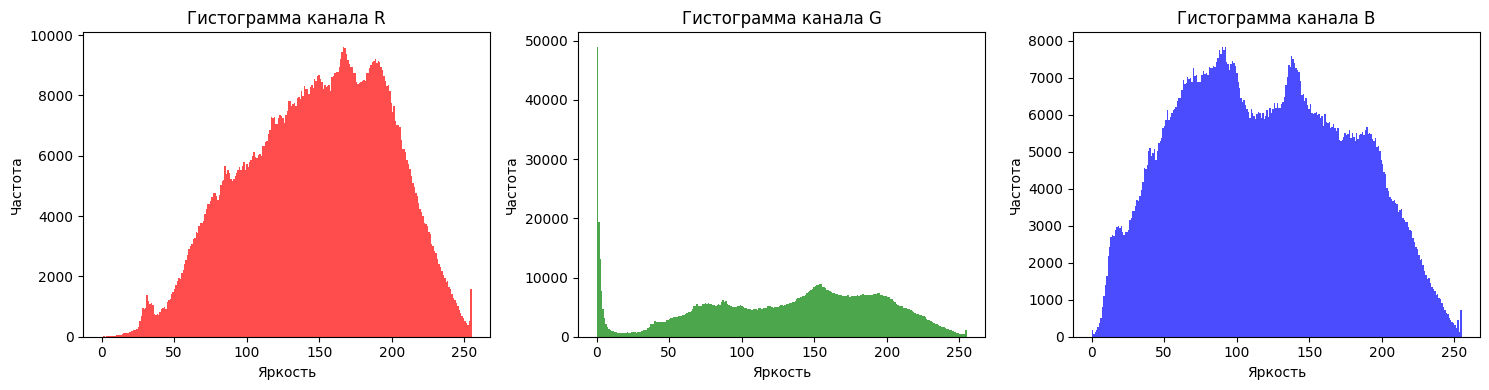

In [23]:
channels = {'R': R, 'G': G, 'B': B}
plt.figure(figsize=(15, 4))

for i, (name, channel) in enumerate(channels.items()):
    flat = (channel * 255).astype(np.uint8).flatten()
    plt.subplot(1, 3, i + 1)
    plt.hist(flat, bins=256, color=name.lower(), alpha=0.7)
    plt.title(f"Гистограмма канала {name}")
    plt.xlabel("Яркость")
    plt.ylabel("Частота")

plt.tight_layout()
plt.show()

### Анализ графиков:
1. Все каналы имеют высокую дисперсию, что указывает на высокий контраст и визуально насыщенное изображение.

2. R-канал имеет самые выраженные средние значения (как в тени, так и в светлых пикселях), что делает его наиболее насыщенным по интенсивности.

3. G-канал наименее выражен, и его низкие значения указывают на преобладание холодных тонов

Из-за широких распределений и множественных пиков на гистограммах, изображение имеет высокую информационную плотность, что подтверждает необходимость достаточно большого числа сингулярных чисел для качественной реконструкции фотографии